# 📓 CCTV System Deployment & Network Coverage Analysis

This notebook presents a comprehensive workflow for data cleaning, analysis, and visualization of the NYC Transit Subway Entrance and Exit dataset, aimed at deriving actionable insights to support the strategic planning of an efficient CCTV deployment system.

### Step 1: Data Preprocessing & Preparation

In [1]:

import pandas as pd

# Upload the excel file (using the file upload button on Colab under 'File' tab)
from google.colab import files
uploaded = files.upload()

# Fetch the dataset
file_path = list(uploaded.keys())[0]
dataset = pd.read_excel(file_path, sheet_name='Cleaned Data')

# Display the first 5 rows
dataset.head()


Saving CCTV_System_Analysis_Processed.xlsx to CCTV_System_Analysis_Processed.xlsx


,Division,Line,Station Name,Station Latitude,Station Longitude,ADA,Free Crossover,North South Street,East West Street,Entrance Latitude,Entrance Longitude
0,BMT,4 Avenue,25th St,40.660397,-73.998091,False,False,4th Ave,25th St,40.660489,-73.998220
1,BMT,4 Avenue,25th St,40.660397,-73.998091,False,False,4th Ave,25th St,40.660323,-73.997952
2,BMT,4 Avenue,36th St,40.655144,-74.003549,False,True,4th Ave,36th St,40.654676,-74.004306
3,BMT,4 Avenue,36th St,40.655144,-74.003549,False,True,4th Ave,36th St,40.654365,-74.004113
4,BMT,4 Avenue,36th St,40.655144,-74.003549,False,True,4th Ave,36th St,40.654490,-74.004499


### Inspect the Dataset

In [2]:

# Basic hygiene checks before proceeding with the dataset
dataset.info()

# Display column names and their datatypes
print(dataset.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Division            1868 non-null   object 
 1   Line                1868 non-null   object 
 2   Station Name        1868 non-null   object 
 3   Station Latitude    1868 non-null   float64
 4   Station Longitude   1868 non-null   float64
 5   ADA                 1868 non-null   bool   
 6   Free Crossover      1868 non-null   bool   
 7   North South Street  1839 non-null   object 
 8   East West Street    1833 non-null   object 
 9   Entrance Latitude   1868 non-null   float64
 10  Entrance Longitude  1868 non-null   float64
dtypes: bool(2), float64(4), object(5)
memory usage: 135.1+ KB
Index(['Division', 'Line', 'Station Name', 'Station Latitude',
       'Station Longitude', 'ADA', 'Free Crossover', 'North South Street',
       'East West Street', 'Entrance Latitude', 'Entran

### Select Relevant Columns

In [3]:

columns_final = [
    "Division", "Line", "Station Name", "Station Latitude", "Station Longitude",
    "ADA", "Free Crossover", "North South Street", "East West Street",
    "Entrance Latitude", "Entrance Longitude"
]

cleaned_data = dataset[columns_final]
cleaned_data.head()


,Division,Line,Station Name,Station Latitude,Station Longitude,ADA,Free Crossover,North South Street,East West Street,Entrance Latitude,Entrance Longitude
0,BMT,4 Avenue,25th St,40.660397,-73.998091,False,False,4th Ave,25th St,40.660489,-73.998220
1,BMT,4 Avenue,25th St,40.660397,-73.998091,False,False,4th Ave,25th St,40.660323,-73.997952
2,BMT,4 Avenue,36th St,40.655144,-74.003549,False,True,4th Ave,36th St,40.654676,-74.004306
3,BMT,4 Avenue,36th St,40.655144,-74.003549,False,True,4th Ave,36th St,40.654365,-74.004113
4,BMT,4 Avenue,36th St,40.655144,-74.003549,False,True,4th Ave,36th St,40.654490,-74.004499


### Handle Missing Values

In [5]:

# Check for missing values
cleaned_data.isnull().sum()

# Remove rows with missing essential data
cleaned_data.dropna(subset=["Station Name", "Station Latitude", "Station Longitude"], inplace=True)


## Step 2: Exploratory Data Analysis

In [6]:

# Count the number of entrances at each station
entrance_count = cleaned_data.groupby('Station Name').size().reset_index(name='Entrance Count')
entrance_count.head()


,Station Name,Entrance Count
0,103rd St,12
1,104th St-102nd St,2
2,104th St-Oxford Av,2
3,110th St,4
4,110th St-Central Park North,2


In [7]:

# Analyze ADA Accessibility Coverage
ada_coverage = cleaned_data.groupby(['Division', 'ADA']).size().reset_index(name='Count')
ada_coverage.head()


,Division,ADA,Count
0,BMT,False,382
1,BMT,True,60
2,IND,False,518
3,IND,True,208
4,IRT,False,500


### Step 3: Creating Visualizations using the python library - matplotlib

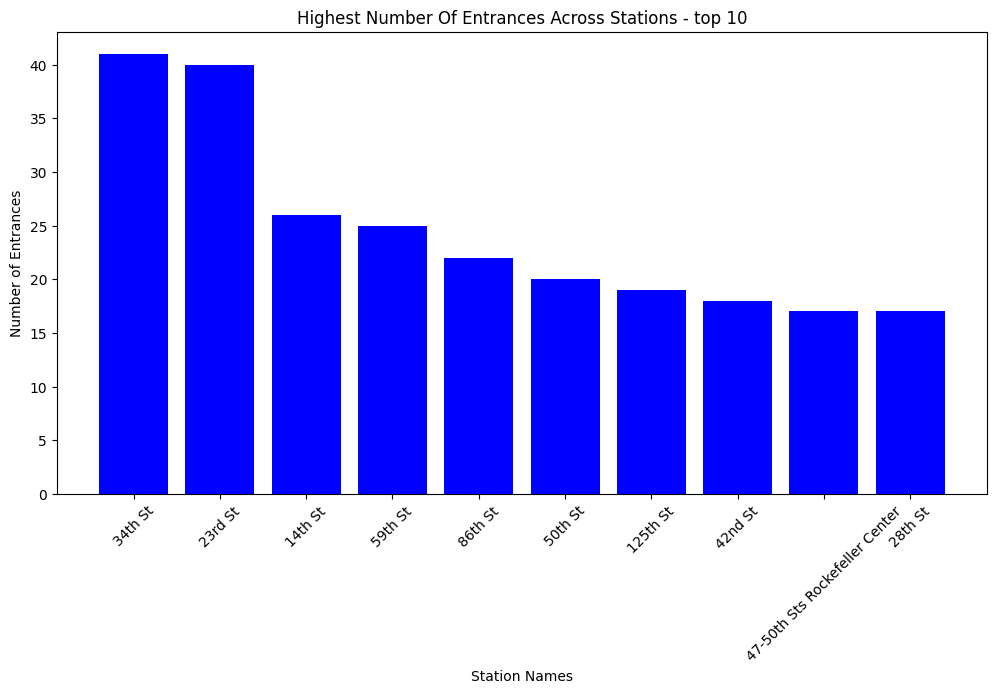

In [12]:

import matplotlib.pyplot as plt

# Plot#1: Highest Number Of Entrances Across Stations - top 10
top_10 = entrance_count.sort_values(by='Entrance Count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10['Station Name'], top_10['Entrance Count'], color='blue')
plt.title('Highest Number Of Entrances Across Stations - top 10')
plt.xlabel('Station Names')         # X-axis label
plt.ylabel('Number of Entrances')  # Y-axis label
plt.xticks(rotation=45)
plt.show()


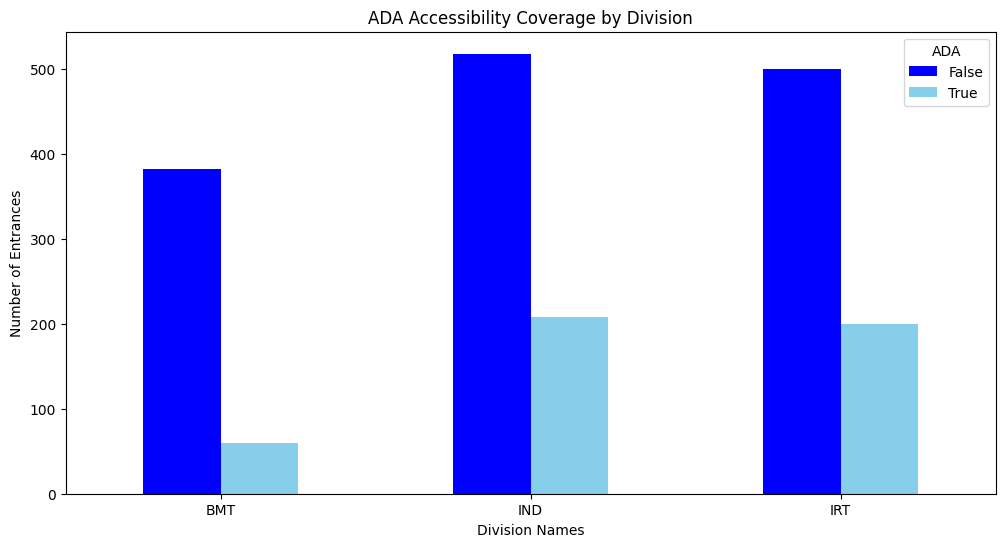

In [14]:

# Plot#2: ADA Accessibility Coverage by Division
ada_coverage_pivot_format = ada_coverage.pivot(index='Division', columns='ADA', values='Count').fillna(0)
ada_coverage_pivot_format.plot(kind='bar', figsize=(12, 6), color=('blue','skyblue'))
plt.title('ADA Accessibility Coverage by Division')
plt.xlabel('Division Names')
plt.ylabel('Number of Entrances')
plt.xticks(rotation=0)
plt.show()
